In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## motus

In [6]:
bgi_bad = pd.read_csv("input/bgi_bad_list.csv")
ill_bad = pd.read_csv("input/ill_bad_list.csv")

# find common bad samples
common_bad = pd.merge(bgi_bad, ill_bad, how='inner', on=['sample'])

# find unique bad samples
bgi_bad_unique = bgi_bad[~bgi_bad['sample'].isin(common_bad['sample'])]
ill_bad_unique = ill_bad[~ill_bad['sample'].isin(common_bad['sample'])]

print("Number of bad samples in BGI: ", len(bgi_bad))
print("Number of bad samples in Illumina: ", len(ill_bad))
print("Number of common bad samples: ", len(common_bad))
print("Number of unique bad samples in BGI: ", len(bgi_bad_unique))
print("Number of unique bad samples in Illumina: ", len(ill_bad_unique))

bgi_bad_unique.to_csv("bgi_bad_unique.csv", index=False)

Number of bad samples in BGI:  100
Number of bad samples in Illumina:  57
Number of common bad samples:  57
Number of unique bad samples in BGI:  43
Number of unique bad samples in Illumina:  0


In [8]:
bgi_good = pd.read_csv("input/bgi_good_list.csv")
ill_good = pd.read_csv("input/ill_good_list.csv")

# find common good samples
common_good = pd.merge(bgi_good, ill_good, how='inner', on=['sample'])

# find unique good samples
bgi_good_unique = bgi_good[~bgi_good['sample'].isin(common_good['sample'])]
ill_good_unique = ill_good[~ill_good['sample'].isin(common_good['sample'])]

print("Number of good samples in BGI: ", len(bgi_good))
print("Number of good samples in Illumina: ", len(ill_good))
print("Number of common good samples: ", len(common_good))
print("Number of unique good samples in BGI: ", len(bgi_good_unique))
print("Number of unique good samples in Illumina: ", len(ill_good_unique))

bgi_good_unique.to_csv("bgi_good_unique.csv", index=False)

Number of good samples in BGI:  99
Number of good samples in Illumina:  35
Number of common good samples:  35
Number of unique good samples in BGI:  64
Number of unique good samples in Illumina:  0


## jellyfish

In [26]:
all_ill = pd.read_csv("input/all_ill_reads_list.csv",header=None)
all_ill.columns = ['sample_path']
all_ill['sample'] = all_ill['sample_path'].str.split('/').str[-1].str.split('.').str[0]
all_ill['sample'] = all_ill['sample'].str.split('_').str[1]
all_ill['sample'] = all_ill['sample'].str.split('-').str[0]
all_ill.tail(2)

,sample_path,sample
5016,/gpfs/space/GI/GV/Projects/Microbiome/Illumina...,VZZW6V
5017,/gpfs/space/GI/GV/Projects/Microbiome/Illumina...,VZZW6V


In [30]:
add_smpl = pd.read_csv("input/add_smpls_path.csv", sep='/', header=None)
add_smpl = add_smpl[16].to_frame()
add_smpl.columns = ['sample']
add_smpl['sample'] = add_smpl['sample']
add_smpl['sample'] = add_smpl['sample'].str.split('_').str[0]
add_smpl.to_csv("add_smpl.csv", index=False)

In [31]:
add_smpl.head(100).to_csv("add_smpl1.csv", index=False, header=False)
add_smpl.head(200).tail(100).to_csv("add_smpl2.csv", index=False, header=False)
add_smpl.head(300).tail(100).to_csv("add_smpl3.csv", index=False, header=False)
add_smpl.head(400).tail(100).to_csv("add_smpl4.csv", index=False, header=False)
add_smpl.head(500).tail(100).to_csv("add_smpl5.csv", index=False, header=False)
add_smpl.tail(92).to_csv("add_smpl6.csv", index=False, header=False)

In [29]:
mrg = add_smpl.merge(all_ill, on='sample', how='inner')
len(mrg['sample'].unique())


592

## Bad samlpes withing bgi-bgi subset

In [35]:
sb = pd.read_csv("input/samples_Bad.csv",header=None)
sb.columns = ['sample']
sw = pd.read_csv("input/samples_Wrs.csv",header=None)
sw.columns = ['sample']

bb = pd.read_csv("input/Intra-Platform_smpls_list_54_sorted.csv")
bb.columns = ['sample']
bb.head(2)

,sample
0,V09EVV
1,V0SVA4


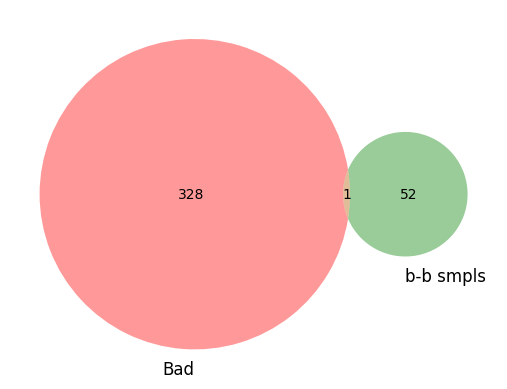

In [37]:
# venn diagram
venn2([set(sb['sample']), set(bb['sample'])], ('Bad', 'b-b smpls'))

In [39]:
set(sb['sample']).intersection(set(bb['sample']))

{'V5IRLB'}

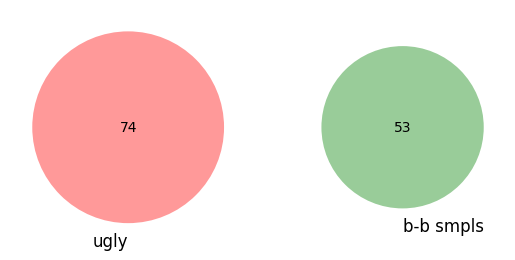

In [38]:
venn2([set(sw['sample']), set(bb['sample'])], ('ugly', 'b-b smpls'))